<a href="https://colab.research.google.com/github/prerit2010/ML-Codes/blob/main/imdb_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import string
from nltk.stem import SnowballStemmer

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/preritgarg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("IMDB_Dataset.csv")

In [ ]:
df.shape

(50000, 2)

In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
stemmer = SnowballStemmer('english')

In [ ]:
stop_words_new = []
NEG = r"""(?:^(?:no|not)$)|n't"""
NEG_RE = re.compile(NEG, re.VERBOSE)
for word in stop_words:
    if not NEG_RE .search(word):
        stop_words_new.append(word)

In [ ]:
CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
def clean_review(review):
    # remove html tags
    review = re.sub(CLEANR, '', review)
    # remove punctation
    review = review.translate(str.maketrans('', '', string.punctuation))
    # to lower
    review = review.lower()
    # remove stop words
    review = ' '.join([word for word in review.split() if word not in stop_words_new])
    # stem the words
    review = ' '.join([stemmer.stem(word) for word in review.split()])
    return review

In [ ]:
df['clean_review'] = df['review'].apply(clean_review)

In [ ]:
df['len'] = df['clean_review'].str.split().apply(len)

In [ ]:
df['len'].mean(), df['len'].median(), df['len'].mode()

(121.52926,
 91.0,
 0    66
 Name: len, dtype: int64)

In [ ]:
print(df.iloc[1]['review'])

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.


In [ ]:
print(clean_review(df.iloc[1]['review']))

wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen not got polari voic pat truli see seamless edit guid refer william diari entri not well worth watch terrif written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done


In [ ]:
words = {}
for index, row in df.iterrows():
    review = clean_review(row['review'])
#     print(review)
    review_words = review.split()
    for word in review_words:
        if word not in words:
            words[word] = 1
        else:
            words[word] += 1

In [ ]:
len(words)

182196

In [ ]:
vocab = sorted(words.items(), key=lambda item: item[1], reverse=True)

In [ ]:
most_freq = vocab[:10000]
most_freq = {k:v for k,v in most_freq}

In [ ]:
sent_vecs = []
for index, row in df.iterrows():
    review = row['clean_review']
    print(index, end='\r')
    review_words = review.split()
#     sent_vec = []
    sent_vec = dict.fromkeys(most_freq,0)
    for word in review_words:
        if word in most_freq:
            sent_vec[word] += 1
    sent_vec = list(sent_vec.values())
#     for word in most_freq:
#         if word in review_words:
#             sent_vec.append(1)
#         else:
#             sent_vec.append(0)
    sent_vecs.append(sent_vec)

In [ ]:
labels = [1 if word == 'positive' else 0 for word in list(df['sentiment'])]

In [ ]:
df['label'] = labels

In [ ]:
len(sent_vecs)

50000

In [ ]:
len(labels)

50000

In [ ]:
import seaborn as sns

<AxesSubplot: xlabel='sentiment', ylabel='count'>

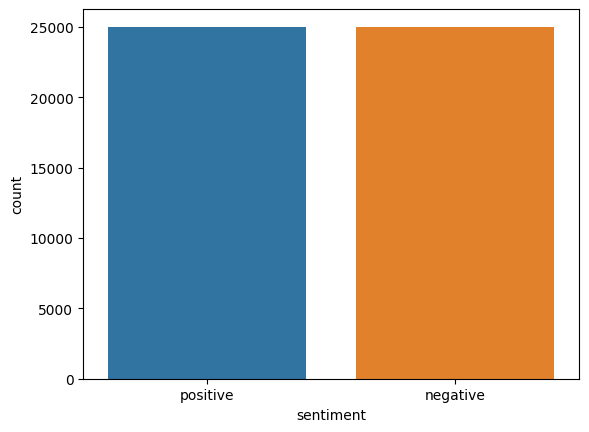

In [ ]:
sns.countplot(data=df, x='sentiment')

In [ ]:
import matplotlib.pyplot as plt

(0.0, 400.0)

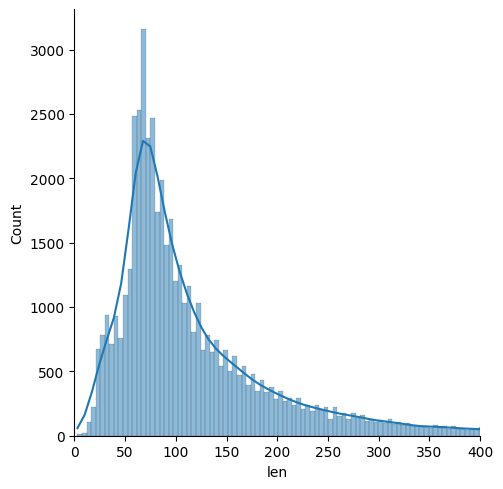

In [ ]:
# plt.figure(figsize=(50,10))
sns.displot(data=df, x='len', kde=True)
plt.xlim(0, 400)

In [ ]:
sent_vecs_ = np.array(sent_vecs)

In [ ]:
sent_vecs_.shape

(50000, 10000)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sent_vecs_, labels, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((40000, 10000), (10000, 10000))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train, Y_train)

/Users/preritgarg/github/imdb_reviews/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
accuracy_score(Y_test, clf.predict(X_test))

0.879

### LSTM

In [ ]:
# import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Layer
from keras import backend as K

In [ ]:
maxlen = int(df['len'].quantile(0.75))
print(maxlen)

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=20000)

In [ ]:
tokenizer.fit_on_texts(
    df['clean_review'].values
)

In [ ]:
X = tokenizer.texts_to_sequences(df['clean_review'].values)

In [ ]:
X = keras.preprocessing.sequence.pad_sequences(X, maxlen=maxlen)

In [ ]:
X.shape

(50000, 148)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, df['label'], test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((40000, 148), (40000,))

In [ ]:
model = Sequential()

# model.add(keras.Input(shape=(None,), dtype="int32"))
model.add(layers.Embedding(20001, 64, input_length=148))
# model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_34 (Embedding)    (None, 148, 64)           1280064   
                                                                 
 bidirectional_37 (Bidirecti  (None, 128)              66048     
 onal)                                                           
                                                                 
 dense_25 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,346,241
Trainable params: 1,346,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, epochs=2, validation_data=(X_test, Y_test),)

Epoch 1/2
  50/1250 [>.............................] - ETA: 2:14 - loss: 0.6808 - accuracy: 0.5681

KeyboardInterrupt: 

In [ ]:
def find_accuracy(X_test, Y_test, thres=0.5):
    preds = model.predict(X_test)
    preds = preds.reshape(10000,)
    preds[preds <= thres] = 0
    preds[preds > thres] = 1
    return accuracy_score(Y_test, preds)

In [ ]:
find_accuracy(X_test, Y_test)

0.8814

### Apply Attention with LSTM

In [ ]:
class attention(Layer):
    def __init__(self, return_sequences=True):
#         self.return_sequences = return_sequences
        super(attention,self).__init__()

    def build(self, input_shape):
        
        super(attention,self).build(input_shape)
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="normal")

    def call(self, x):
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        return K.sum(output, axis=1)

In [ ]:
model = Sequential()
model.add(layers.Embedding(20001, 64, input_length=maxlen))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model.add(attention(return_sequences=True))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_38 (Embedding)    (None, 148, 64)           1280064   
                                                                 
 bidirectional_41 (Bidirecti  (None, 148, 128)         66048     
 onal)                                                           
                                                                 
 attention_17 (attention)    (None, 128)               276       
                                                                 
 dense_29 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,346,517
Trainable params: 1,346,517
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, epochs=2, validation_data=(X_test, Y_test),)

Epoch 1/2
1250/1250 [==============================] - 160s 124ms/step - loss: 0.3511 - accuracy: 0.8433 - val_loss: 0.2777 - val_accuracy: 0.8859
Epoch 2/2
1250/1250 [==============================] - 151s 120ms/step - loss: 0.2058 - accuracy: 0.9200 - val_loss: 0.2907 - val_accuracy: 0.8810


In [ ]:
find_accuracy(X_test, Y_test)

313/313 [==============================] - 11s 32ms/step


0.881

### BERT Transformer

In [ ]:
from transformers import BertTokenizer
import tensorflow as tf

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
max_length = 128
batch_size = 16

In [ ]:
def convert_example_to_feature(review):
    return tokenizer.encode_plus(review,
                add_special_tokens = True, # add [CLS], [SEP]
                max_length = max_length, # max length of the text that can go to BERT
                pad_to_max_length = True, # add [PAD] tokens
                return_attention_mask = True, # add attention mask to not focus on pad tokens
              )

In [ ]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
    return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

In [ ]:
def encode_examples(df, limit=-1):
  # prepare list, so that we can build up final TensorFlow dataset from slices.
    input_ids_list = []
    token_type_ids_list = []
    attention_mask_list = []
    label_list = []
#     if (limit > 0):
#         ds = ds.take(limit)
    for index, row in df.iterrows():
        review = row['clean_review']
        label = row['label']
        bert_input = convert_example_to_feature(review)
        input_ids_list.append(bert_input['input_ids'])
        token_type_ids_list.append(bert_input['token_type_ids'])
        attention_mask_list.append(bert_input['attention_mask'])
        label_list.append([label])
    return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)


In [ ]:
df_train, df_test = train_test_split(df[['clean_review', 'label']], test_size=0.2)

In [ ]:
# train dataset
ds_train_encoded = encode_examples(df_train).shuffle(10000).batch(batch_size)
# test dataset
ds_test_encoded = encode_examples(df_test).batch(batch_size)

In [ ]:
from transformers import TFBertForSequenceClassification
import tensorflow as tf
# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 2e-5
# we will do just 1 epoch, though multiple epochs might be better as long as we will not overfit the model
number_of_epochs = 1
# model initialization
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# choosing Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)
# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
bert_history = model.fit(ds_train_encoded, epochs=number_of_epochs, validation_data=ds_test_encoded)

 455/2500 [====>.........................] - ETA: 10:32:30 - loss: 0.5135 - accuracy: 0.7332


KeyboardInterrupt



In [ ]:
tf_output = model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1)
labels = ['Negative','Positive'] #(0:negative, 1:positive)
label = tf.argmax(tf_prediction, axis=1)
label = label.numpy()
print(labels[label[0]])